In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


In [3]:
breast_cancer_df = pd.read_csv("C:\\Users\\mkk76\\OneDrive\\Documents\\GitHub\\SCT_DS_2\\breast_cancer_data.csv")
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Data cleaning

In [4]:
print(breast_cancer_df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [6]:
breast_cancer_df.dropna(inplace=True)

In [8]:
print(breast_cancer_df.duplicated().sum())
breast_cancer_df.drop_duplicates(inplace=True)

0


In [9]:
breast_cancer_df['target'] = breast_cancer_df['target'].astype('category')

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(breast_cancer_df.drop('target', axis=1))
breast_cancer_df_scaled = pd.DataFrame(scaled_features, columns=breast_cancer_df.columns[:-1])
breast_cancer_df_scaled['target'] = breast_cancer_df['target'].values

Exploring Data Analytics

In [15]:
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


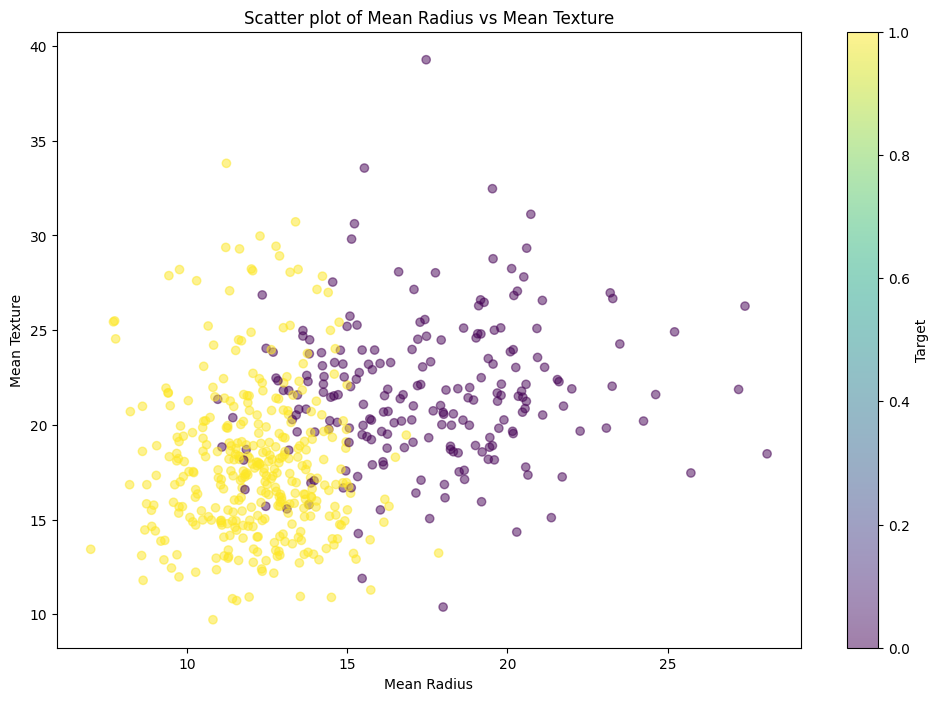

In [16]:
plt.figure(figsize=(12, 8))
plt.scatter(breast_cancer_df['mean radius'], breast_cancer_df['mean texture'], c=breast_cancer_df['target'].cat.codes, cmap='viridis', alpha=0.5)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Scatter plot of Mean Radius vs Mean Texture')
plt.colorbar(label='Target')
plt.show()

In [18]:
correlation_matrix = breast_cancer_df.corr()

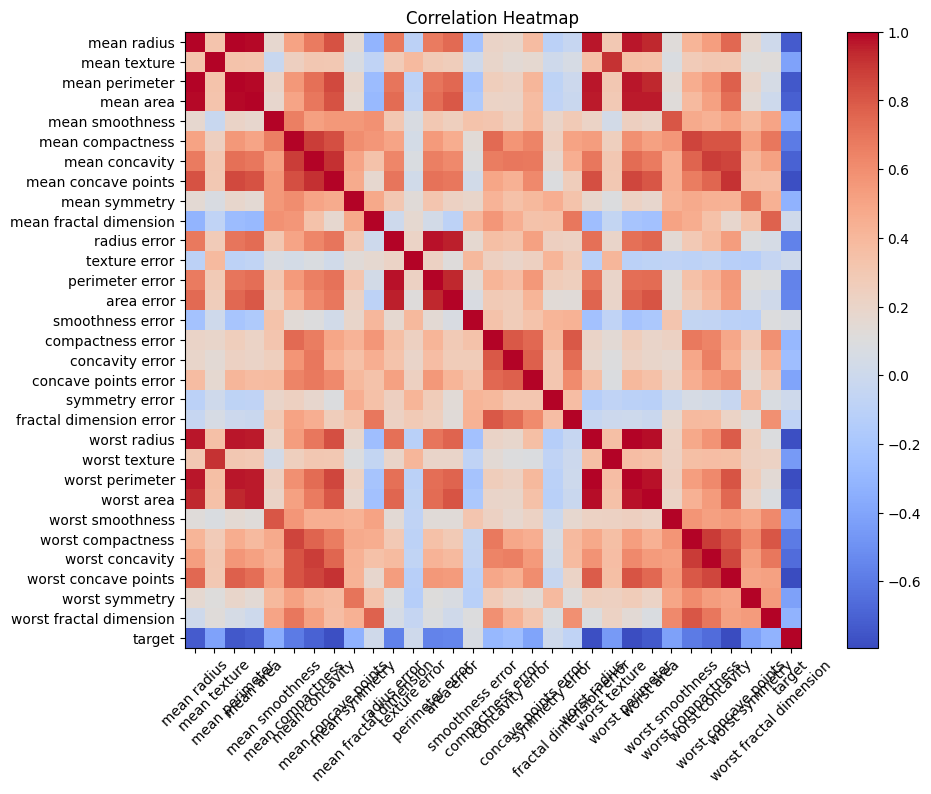

In [19]:
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

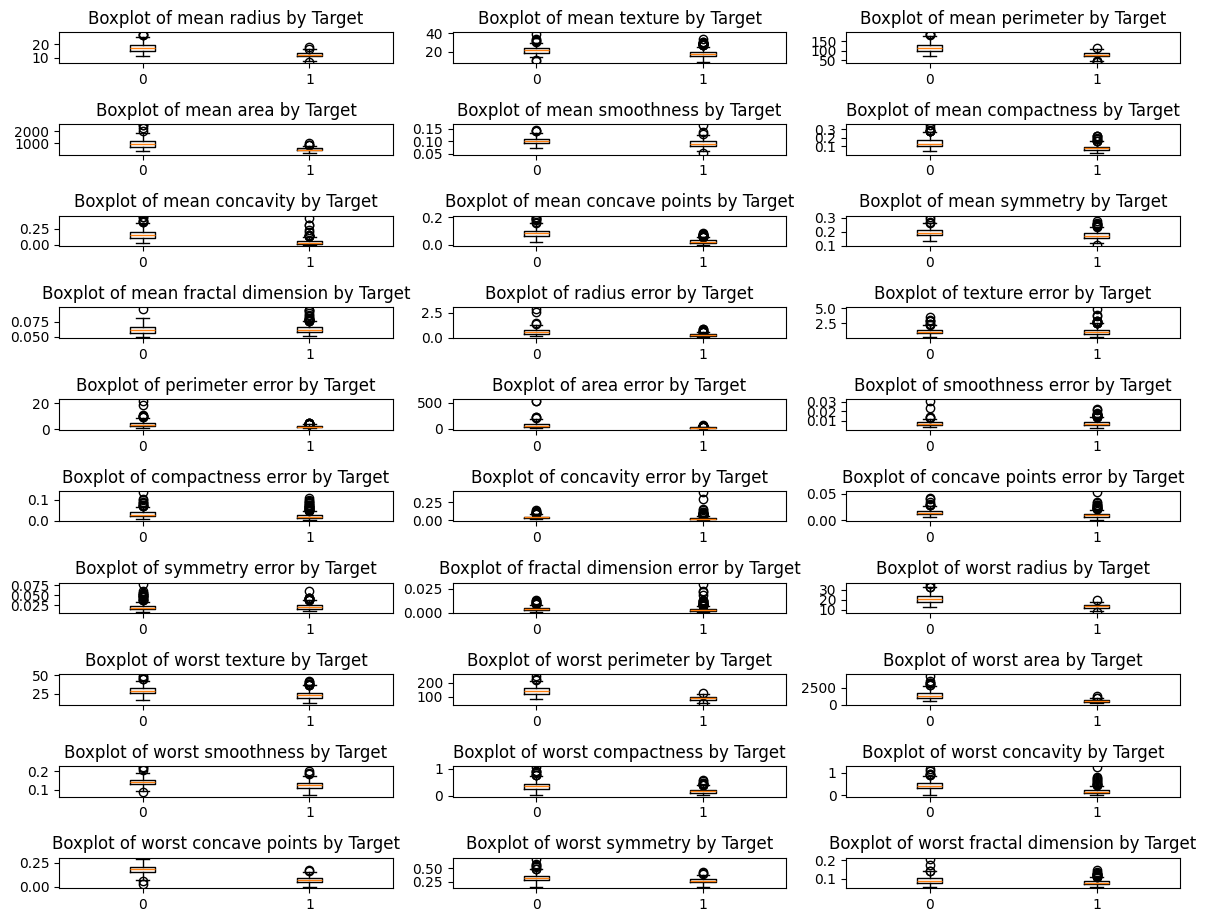

In [21]:
plt.figure(figsize=(12, 10))
num_cols = 3  # Number of columns for subplots
num_rows = (len(breast_cancer_df.columns) - 1) // num_cols + 1  # Calculate rows needed

for i, col in enumerate(breast_cancer_df.columns[:-1]):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.boxplot([breast_cancer_df[breast_cancer_df['target'] == t][col] for t in breast_cancer_df['target'].unique()])
    plt.title(f'Boxplot of {col} by Target')
    plt.xticks(range(1, len(breast_cancer_df['target'].unique()) + 1), breast_cancer_df['target'].unique())

plt.tight_layout()
plt.show()


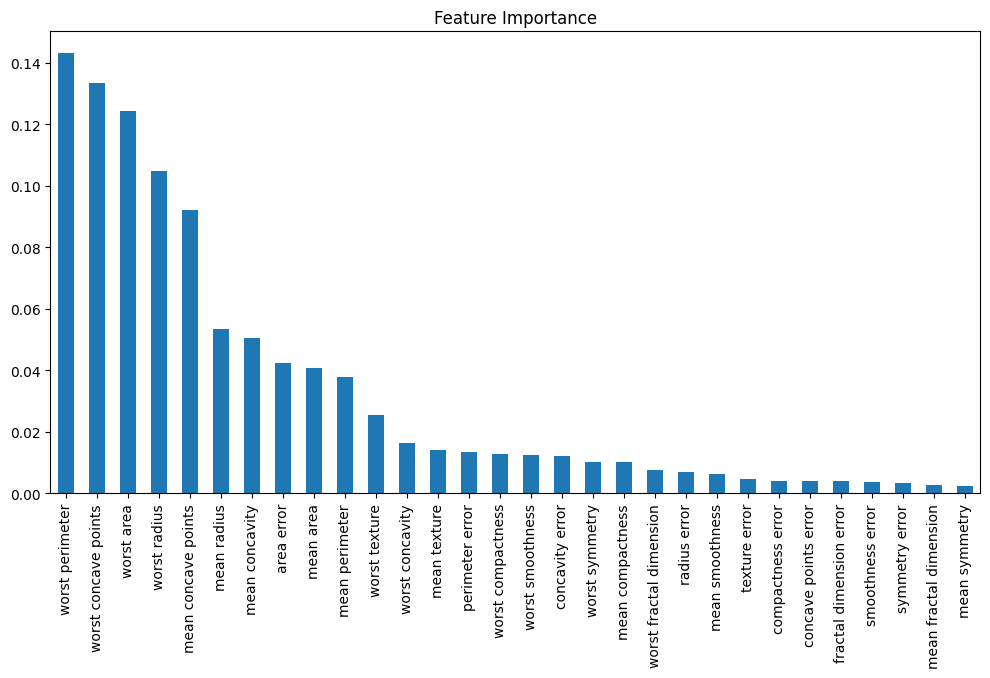

In [22]:
X = breast_cancer_df.drop('target', axis=1)
y = breast_cancer_df['target']

model = RandomForestClassifier()
model.fit(X, y)

importance = model.feature_importances_
features = breast_cancer_df.columns[:-1]
feature_importance = pd.Series(importance, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()